In [ ]:
# projet MAP568
# Fan JIANG

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
import scipy.optimize as opt
from scipy import integrate

# Q1

In [2]:
#Q 1.1
sigma_mes = 0.1
n_data = 10
X_data = np.linspace(0,1,n_data)
epsi = np.random.randn(n_data)*sigma_mes
Y_data = X_data + epsi
H = np.stack([np.ones(n_data), X_data],axis = 1) # tenseur de susceptibilite
gamma = np.linalg.inv(np.dot(H.T,H))
beta_hat= np.dot(gamma,np.dot(H.T,Y_data)) # beta hat, le parametre de modele

In [3]:
beta_hat

array([ 0.00627416,  0.96077057])

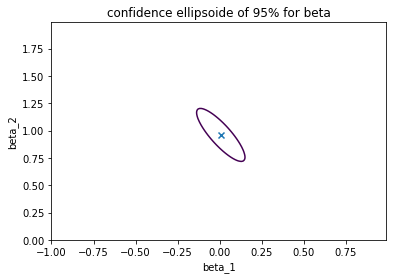

In [4]:
delta = 0.01
x = np.arange(-1,1,delta)
y = np.arange(0,2,delta)
n_x = len(x)
n_y = len(y)
xx, yy = np.meshgrid(x,y)
Z = np.zeros((n_x,n_y))
for i in range(n_x):
    for j in range(n_y):
        beta = np.array([x[i]-beta_hat[0], y[j]- beta_hat[1]])
        Z[i,j] = beta.T.dot(H.T.dot(H.dot(beta)))
        
plt.figure()
plt.scatter(beta_hat[0], beta_hat[1], marker="x")
plt.contour(xx,yy, Z.T, [6.0*sigma_mes**2])
plt.title("confidence ellipsoide of 95% for beta")
plt.xlabel("beta_1")
plt.ylabel("beta_2")
plt.show()

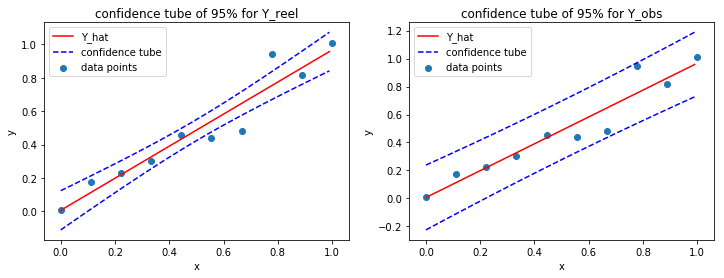

In [5]:
xx = np.arange(0,1,delta)
n_x = len(xx)
h = np.stack([np.ones(n_x), xx],axis = 1)
Y_hat = h.dot(beta_hat)
q2_pred = np.sum(h.T * gamma.dot(h.T),axis = 0)
q_pred = np.sqrt(q2_pred)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_hat,color='red', label = "Y_hat")
plt.plot(xx,Y_hat - 2*sigma_mes*q_pred, color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_hat + 2*sigma_mes*q_pred, color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_hat,color='red', label = "Y_hat")
plt.plot(xx,Y_hat - 2*sigma_mes*np.sqrt(1 + q2_pred), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_hat + 2*sigma_mes*np.sqrt(1 + q2_pred), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_obs")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [6]:
epsilon_hat = (np.identity(n_data)- H.dot(gamma.dot(H.T))).dot(Y_data)
norm2_epsi = epsilon_hat.T.dot(epsilon_hat)
chi = norm2_epsi/sigma_mes**2

alpha = 0.05
left = sts.chi2.ppf(alpha/2., n_data-2)
right = sts.chi2.ppf(1 - alpha/2., n_data-2)
print("interval: ["+str(left)+", "+str(right)+"]")
print("residus: "+ str(chi))
if chi >= left and chi <= right:
    print("residual test succeded, so the assumed model is pertinent to describe the reality")
else:
    print("residual test failed, so the assumed model does not reflect the reality")

interval: [2.17973074725, 17.5345461395]
residus: 8.21091040606
residual test succeded, so the assumed model is pertinent to describe the reality


## Experiments with different values of n and sigma

For the sake of simplicity, we will not show the results using other n and sigma values.

The confidence ellipsoide of beta and the confidence tube of y will be tighter if we increase the nuber of data points n. On the contrary, the measure error sigma will make the confidence ellipsoide and confidence tube larger if we increase the value of sigma. In all cases, the residual test succeded. The real data points are linear, so our assumed model is suitbale to decribe the data, thus, the residual test will always succeed no matter the values.

Now, we suppose that we do not know the real value of $\sigma_{mes}^2$, and we will estimate it.

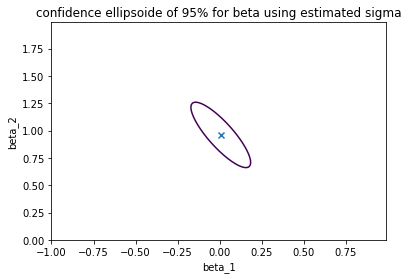

In [7]:
sigma2_hat = norm2_epsi/(n_data-2)
delta = 0.01
x = np.arange(-1,1,delta)
y = np.arange(0,2,delta)
n_x = len(x)
n_y = len(y)
xx, yy = np.meshgrid(x,y)
Z = np.zeros((n_x,n_y))
for i in range(n_x):
    for j in range(n_y):
        beta = np.array([x[i]-beta_hat[0], y[j]- beta_hat[1]])
        Z[i,j] = beta.T.dot(H.T.dot(H.dot(beta)))
        
plt.figure()
plt.scatter(beta_hat[0], beta_hat[1], marker="x")
plt.contour(xx,yy, Z.T, [8.9*sigma2_hat])
plt.title("confidence ellipsoide of 95% for beta using estimated sigma")
plt.xlabel("beta_1")
plt.ylabel("beta_2")
plt.show()

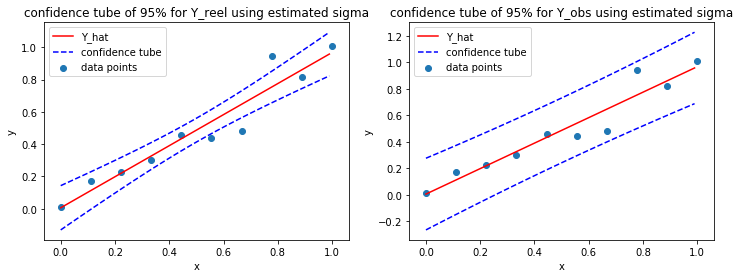

In [8]:
xx = np.arange(0,1,delta)
n_x = len(xx)
h = np.stack([np.ones(n_x), xx],axis = 1)
Y_hat = h.dot(beta_hat)
q2_pred = np.sum(h.T * gamma.dot(h.T),axis = 0)
q_pred = np.sqrt(q2_pred)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_hat,color='red', label = "Y_hat")
plt.plot(xx,Y_hat - 2.3*np.sqrt(sigma2_hat)*q_pred, color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_hat + 2.3*np.sqrt(sigma2_hat)*q_pred, color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_reel using estimated sigma")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_hat,color='red', label = "Y_hat")
plt.plot(xx,Y_hat - 2.3*np.sqrt(sigma2_hat)*np.sqrt(1 + q2_pred), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_hat + 2.3*np.sqrt(sigma2_hat)*np.sqrt(1 + q2_pred), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_obs using estimated sigma")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [9]:
repeat = 1000
counts = 0
for i in range(repeat):
    sigma_mes = 0.1
    n_data = 10
    X_data = np.linspace(0,1,n_data)
    epsi = np.random.randn(n_data)*sigma_mes
    Y_data = X_data + epsi
    H = np.stack([np.ones(n_data), X_data],axis = 1)
    gamma = np.linalg.inv(np.dot(H.T,H))
    beta_hat= np.dot(gamma,np.dot(H.T,Y_data)) 
    x_test = 0.5
    y_real = x_test
    h = np.array([1, x_test])
    y_pred = h.T.dot(beta_hat)
    q2_pred = h.T.dot(gamma.dot(h))
    left = y_pred - 2*sigma_mes*np.sqrt(q2_pred)
    right = y_pred + 2*sigma_mes*np.sqrt(q2_pred)
    if y_real >= left and y_real <= right:
        counts+=1
print("percentage of falling in the confidence interval of 95%: "+ str(counts/repeat))
print("So there are about 95% experiments during which Y_reel falled into the confidence interval")

percentage of falling in the confidence interval of 95%: 0.951
So there are about 95% experiments during which Y_reel falled into the confidence interval


# Q2

In [18]:
#Q2
sigma_mes = 0.1
n_data = 10
X_data = np.linspace(0,1,n_data)
epsi = np.random.randn(n_data)*sigma_mes
Y_data = X_data**2 + epsi
H = np.stack([np.ones(n_data), X_data],axis = 1)
gamma = np.linalg.inv(np.dot(H.T,H))
beta_hat= np.dot(gamma,np.dot(H.T,Y_data))

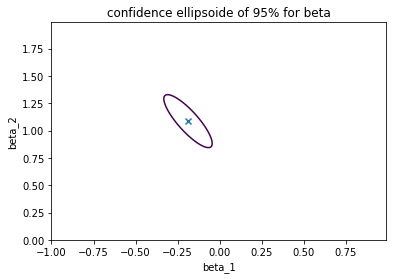

In [19]:
delta = 0.01
x = np.arange(-1,1,delta)
y = np.arange(0,2,delta)
n_x = len(x)
n_y = len(y)
xx, yy = np.meshgrid(x,y)
Z = np.zeros((n_x,n_y))
for i in range(n_x):
    for j in range(n_y):
        beta = np.array([x[i]-beta_hat[0], y[j]- beta_hat[1]])
        Z[i,j] = beta.T.dot(H.T.dot(H.dot(beta)))
        
plt.figure()
plt.scatter(beta_hat[0], beta_hat[1],marker = "x")
plt.contour(xx,yy, Z.T, [6.0*sigma_mes**2])
plt.title("confidence ellipsoide of 95% for beta")
plt.xlabel("beta_1")
plt.ylabel("beta_2")
plt.show()

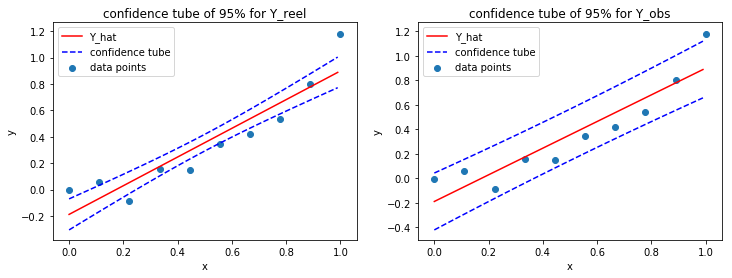

In [20]:
xx = np.arange(0,1,delta)
n_x = len(xx)
h = np.stack([np.ones(n_x), xx],axis = 1)
Y_hat = h.dot(beta_hat)
q2_pred = np.sum(h.T * gamma.dot(h.T),axis = 0)
q_pred = np.sqrt(q2_pred)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_hat,color='red', label = "Y_hat")
plt.plot(xx,Y_hat - 2*sigma_mes*q_pred, color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_hat + 2*sigma_mes*q_pred, color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_hat,color='red', label = "Y_hat")
plt.plot(xx,Y_hat - 2*sigma_mes*np.sqrt(1 + q2_pred), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_hat + 2*sigma_mes*np.sqrt(1 + q2_pred), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_obs")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
epsilon_hat = (np.identity(n_data)- H.dot(gamma.dot(H.T))).dot(Y_data)
norm2_epsi = epsilon_hat.T.dot(epsilon_hat)
chi = norm2_epsi/sigma_mes**2

alpha = 0.05
left = sts.chi2.ppf(alpha/2., n_data-2)
right = sts.chi2.ppf(1 - alpha/2., n_data-2)
print("interval: ["+str(left)+", "+str(right)+"]")
print("residus: "+ str(chi))
if chi >= left and chi <= right:
    print("residual test succeded, so the assumed model is pertinent to describe the reality")
else:
    print("residual test failed, so the assumed model does not reflect the reality")

interval: [2.17973074725, 17.5345461395]
residus: 20.4049556434
residual test failed, so the assumed model does not reflect the reality


## Experiments with different values of n and sigma

For the sake of simplicity, we will not show the results using other n and sigma values.

The confidence ellipsoide of beta and the confidence tube of y will be tighter if we increase the nuber of data points n. On the contrary, the measure error sigma will make the confidence ellipsoide and confidence tube larger if we increase the value of sigma. 

The residual test showed different results comparing with Q1. The real data points are not linear, so our assumed model is actually not suitbale to decribe the data. When n=10, sigma=0.1, the residual tests failed in many cases, which means the assumed linear model is not appropriate. However, sometimes, it can also succeed due to the lack of data. If we increase the value of sigma, the residual test will become successful at some time, because the measure errors are so big that we cannot reach a correct conclusion. In this case, if we increase the number of data points, the residual tests will become failed again, because we can reach a correct conclusion with more data. From the experiments, we can see that the size of data set is critical to reach a correct conclusion. Without enough data, the residual test may give a wrong result.

# Q3

In [22]:
#Q3
sigma_mes = 0.1
sigma_mod = 0.2
l_c = 0.5
n_data = 10
X_data = np.linspace(0,1,n_data)
epsi = np.random.randn(n_data)*sigma_mes
Y_data = X_data**2 + epsi
H = np.stack([np.ones(n_data), X_data],axis = 1)

In [23]:
R = sigma_mes**2 *np.identity(n_data)
R += sigma_mod**2*np.exp(-(X_data.reshape((-1,1)) - X_data.reshape((1,-1)))**2/(l_c**2))
R_inv = np.linalg.inv(R)
Q_post_inv = np.dot(H.T,R_inv.dot(H))
Q_post = np.linalg.inv(Q_post_inv)
beta_post = Q_post.dot(H.T.dot(R_inv.dot(Y_data)))
beta_post

array([-0.01464931,  0.79719561])

As we know $Q_{post}^{-1/2}(\beta - \beta_{post})$ follows a guassian distribution $ N(0, Id)$.
Thus, $\Vert Q_{post}^{-1/2}(\beta - \beta_{post}) \Vert^2$ follws a Chi-squared distribution $ \chi^2_{p=2}$. Therefore, the confidence ellipsoide will be $$ \{\beta : (\beta - \beta_{post})^T Q_{post}^{-1}(\beta - \beta_{post}) \leq 6\}$$, where 6 is 95% quantile of $\chi^2_{p=2}$ distribution

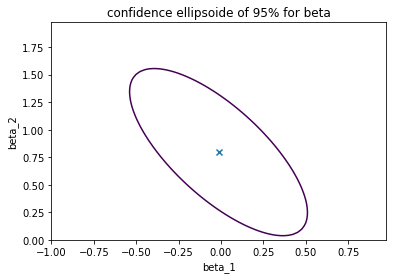

In [24]:
level = sts.chi2.ppf(0.95,2)
delta = 0.025
x = np.arange(-1,1,delta)
y = np.arange(0,2,delta)
n_x = len(x)
n_y = len(y)
xx, yy = np.meshgrid(x,y)
Z = np.zeros((n_x,n_y))
for i in range(n_x):
    for j in range(n_y):
        beta = np.array([x[i]-beta_post[0], y[j]- beta_post[1]])
        Z[i,j] = beta.T.dot(Q_post_inv.dot(beta))
        
plt.figure()
plt.scatter(beta_post[0], beta_post[1],marker = "x")
plt.contour(xx,yy, Z.T, [level])
plt.title("confidence ellipsoide of 95% for beta")
plt.xlabel("beta_1")
plt.ylabel("beta_2")
plt.show()

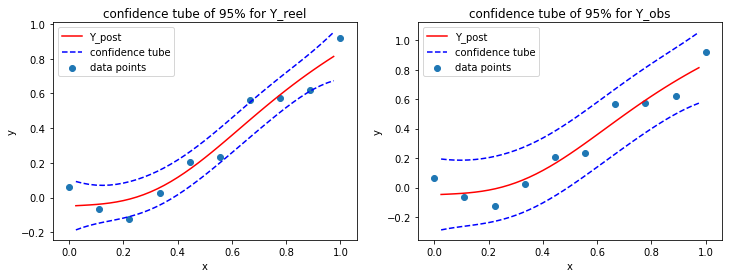

In [25]:
xx = np.arange(delta,1,delta)
n_x = len(xx)
h = np.stack([np.ones(n_x), xx],axis = 1)
r = sigma_mod**2*np.exp(-(xx.reshape((-1,1)) - X_data.reshape((1,-1)))**2/(l_c**2))
Y_post = h.dot(beta_post)+r.dot(R_inv.dot(Y_data-H.dot(beta_post)))
mat_block = np.block([[np.zeros((2,2)),H.T],[H,R]])
mat_block_inv = np.linalg.inv(mat_block)
vec_block = np.block([[h.T],[r.T]])
vec_block_trans = vec_block.T
Var_post = sigma_mod**2 - np.diag(vec_block_trans.dot(mat_block_inv.dot(vec_block)))


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post+sigma_mes**2), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post+sigma_mes**2), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_obs")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


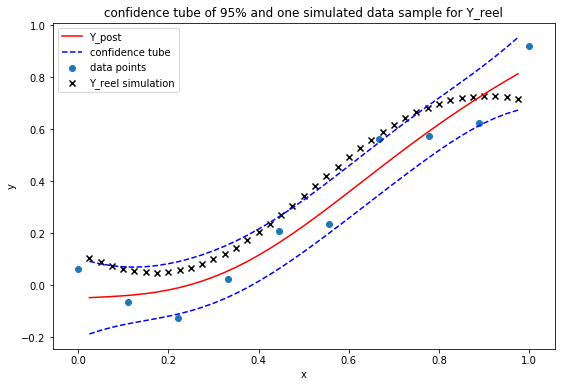

In [26]:
# prior covariance matrix
Cov_y_prior = sigma_mod*sigma_mod *np.exp(-(xx.reshape((-1,1)) - xx.reshape((1,-1)))**2/(l_c**2))
# posterior covariance matrix
Cov_y_post = Cov_y_prior - vec_block_trans.dot(mat_block_inv.dot(vec_block)) + 1e-15 *np.identity(n_x)
# cholesky decomposition
L = np.linalg.cholesky(Cov_y_post) 
y_real = Y_post + L.dot(np.random.randn(n_x))

plt.figure(figsize=(9,6))
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed')
plt.scatter(xx, y_real, marker='x',color="black", label = "Y_reel simulation")
plt.title("confidence tube of 95% and one simulated data sample for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Now, we will suppose that we do not know the value of $\sigma_{mod}$, and try to use maximum of likelihood method to estimate its value

In [27]:
# determine sigma_mod by maximum of likelihood
def likelihood(x, X_data, Y_data, sigma_mes, l_c):
    n_data = len(X_data)
    H = np.stack([np.ones(n_data), X_data],axis = 1)
    R = sigma_mes**2*np.identity(n_data)
    R += x**2 *np.exp(-(X_data.reshape((-1,1)) - X_data.reshape((1,-1)))**2/(l_c**2))
    R_inv = np.linalg.inv(R)
    Q_post_inv = np.dot(H.T,R_inv.dot(H))
    Q_post = np.linalg.inv(Q_post_inv)
    beta_post = Q_post.dot(H.T.dot(R_inv.dot(Y_data)))
    mat = Y_data - H.dot(beta_post)
    return np.log(np.linalg.det(R)) + mat.T.dot(R_inv.dot(mat))

res = opt.minimize(likelihood, 0.15,args=(X_data,Y_data, sigma_mes,l_c))

In [28]:
sigma_mod = res.x
res

      fun: -31.5012337406467
 hess_inv: array([[ 0.00137691]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ -7.89540846e-09])

In [29]:
R = sigma_mes**2*np.identity(n_data)
R += sigma_mod**2 *np.exp(-(X_data.reshape((-1,1)) - X_data.reshape((1,-1)))**2/(l_c**2))
R_inv = np.linalg.inv(R)
Q_post_inv = np.dot(H.T,R_inv.dot(H))
Q_post = np.linalg.inv(Q_post_inv)
beta_post = Q_post.dot(H.T.dot(R_inv.dot(Y_data)))
beta_post

array([-0.17833033,  0.96180811])

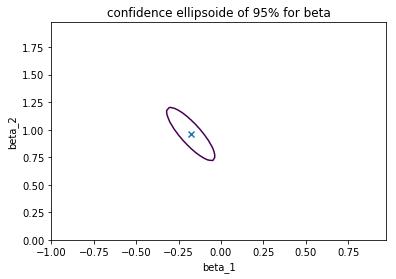

In [30]:
level = sts.chi2.ppf(0.95,2)
delta = 0.025
x = np.arange(-1,1,delta)
y = np.arange(0,2,delta)
n_x = len(x)
n_y = len(y)
xx, yy = np.meshgrid(x,y)
Z = np.zeros((n_x,n_y))
for i in range(n_x):
    for j in range(n_y):
        beta = np.array([x[i]-beta_post[0], y[j]- beta_post[1]])
        Z[i,j] = beta.T.dot(Q_post_inv.dot(beta))
        
plt.figure()
plt.scatter(beta_post[0], beta_post[1],marker = "x")
plt.contour(xx,yy, Z.T, [level])
plt.title("confidence ellipsoide of 95% for beta")
plt.xlabel("beta_1")
plt.ylabel("beta_2")
plt.show()

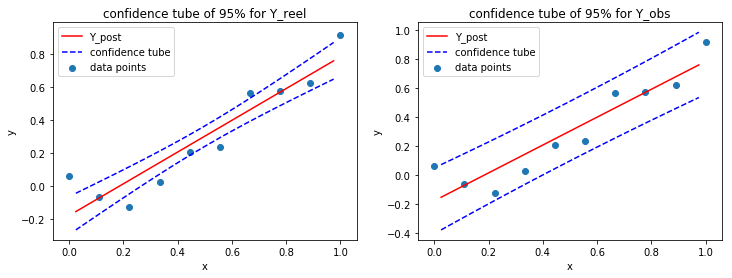

In [31]:
xx = np.arange(delta,1,delta)
n_x = len(xx)
h = np.stack([np.ones(n_x), xx],axis = 1)
r = sigma_mod**2*np.exp(-(xx.reshape((-1,1)) - X_data.reshape((1,-1)))**2/(l_c**2))
Y_post = h.dot(beta_post)+r.dot(R_inv.dot(Y_data-H.dot(beta_post)))
mat_block = np.block([[np.zeros((2,2)),H.T],[H,R]])
mat_block_inv = np.linalg.inv(mat_block)
vec_block = np.block([[h.T],[r.T]])
vec_block_trans = vec_block.T
Var_post = sigma_mod**2 - np.diag(vec_block_trans.dot(mat_block_inv.dot(vec_block)))


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post+sigma_mes**2), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post+sigma_mes**2), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_obs")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

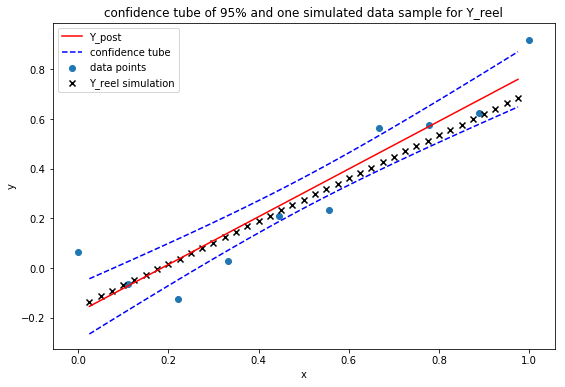

In [32]:
# prior covariance matrix
Cov_y_prior = sigma_mod*sigma_mod *np.exp(-(xx.reshape((-1,1)) - xx.reshape((1,-1)))**2/(l_c**2))
# posterior covariance matrix
Cov_y_post = Cov_y_prior - vec_block_trans.dot(mat_block_inv.dot(vec_block)) + 1e-15 *np.identity(n_x)
# cholesky decomposition
L = np.linalg.cholesky(Cov_y_post) 
y_real = Y_post + L.dot(np.random.randn(n_x))

plt.figure(figsize=(9,6))
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed')
plt.scatter(xx, y_real, marker='x',color="black", label = "Y_reel simulation")
plt.title("confidence tube of 95% and one simulated data sample for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Q4

In [33]:
#Q4
n_grid = 2001
x_grid = np.linspace(0,1,n_grid)
def f(x):
    return 2+np.cos(4*x)+2*x+x*x-np.exp(x)+0.3*np.sin(12*x)

# estimate integral by using finite difference mehtod
y_grid = f(x_grid)
dx = x_grid[1:] - x_grid[0:-1]
f_deriv = (y_grid[1:] - y_grid[0:-1])/(dx)
L_numeric = np.sqrt(1+f_deriv**2).T.dot(dx)
L_numeric

2.9293247741995838

In [34]:
# estimate integral by calculating explicitly the derivative and using quadrature method of numpy
def f_prime(x):
    return -4*np.sin(4*x)+2+2*x-np.exp(x)+3.6*np.cos(12*x)
def integrand(x):
    return np.sqrt(1+f_prime(x)**2)
L = integrate.quad(integrand,0,1)
L

(2.9293279341770493, 7.444359762817546e-09)

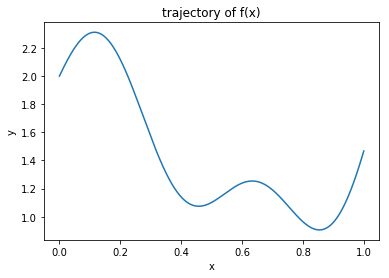

In [35]:
plt.figure()
plt.plot(x_grid, y_grid)
plt.xlabel("x")
plt.ylabel("y")
plt.title("trajectory of f(x)")
plt.show()

The Matern 3/2 convariance function is $$ C_{3/2}(d) = \sigma^2(1+\frac{\sqrt{6}d}{l_c})\exp({-\frac{\sqrt{6}d}{l_c}})$$

In [36]:
X_data = np.arange(0,1.2,0.2)
Y_data = f(X_data)
n_data = len(X_data)
H = np.stack([np.ones(n_data), X_data],axis = 1)
sigma2 = 0.2
l_c =0.4
dist = np.abs(X_data.reshape((-1,1))-X_data.reshape((1,-1)))
R = sigma2*(1+np.sqrt(6)*dist/l_c)*np.exp(-np.sqrt(6)*dist/l_c)

R_inv = np.linalg.inv(R)
Q_post_inv = np.dot(H.T,R_inv.dot(H))
Q_post = np.linalg.inv(Q_post_inv)
beta_post = Q_post.dot(H.T.dot(R_inv.dot(Y_data)))
beta_post

array([ 1.77162271, -0.417354  ])

/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


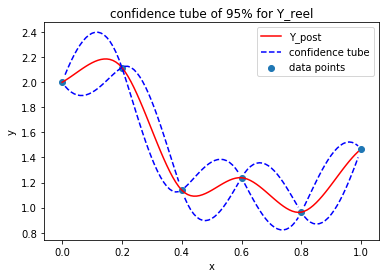

In [37]:
delta = 0.01
xx = np.arange(0,1,delta)
n_x = len(xx)
h = np.stack([np.ones(n_x), xx],axis = 1)
dist_r = np.abs(xx.reshape((-1,1))-X_data.reshape((1,-1)))
r = sigma2*(1+np.sqrt(6)*dist_r/l_c)*np.exp(-np.sqrt(6)*dist_r/l_c)

Y_post = h.dot(beta_post)+r.dot(R_inv.dot(Y_data-H.dot(beta_post)))
mat_block = np.block([[np.zeros((2,2)),H.T],[H,R]])
mat_block_inv = np.linalg.inv(mat_block)
vec_block = np.block([[h.T],[r.T]])
vec_block_trans = vec_block.T
Var_post = sigma2 - np.diag(vec_block_trans.dot(mat_block_inv.dot(vec_block)))


plt.figure()
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='red', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed')
plt.title("confidence tube of 95% for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



In [38]:
# estimate integral by using finite difference mehtod
dx = xx[1:] - xx[0:-1]
f_deriv = (Y_post[1:] - Y_post[0:-1])/(dx)
L_numeric = np.sqrt(1+f_deriv**2).T.dot(dx)
L_numeric

2.5005411942931506

## Explanation:
Firstly, we only have several observation points, which cannot fully reflect the shape of the seabed. If the seabed is very rugged, only a few observation points will result in a much smoother trajectory estimation. Secondly, we estimate the integral by using the trajectory of Y_post, which is the expectation of the gaussian process. However, we cannot say that this trajectory is the real trajectory of the seabed. The real shape of seabed may be higher or lower than this expectation. Thus using this trajectory will result in a subestimation. Thirdly, only using this expectation trajectory also means that we have neglectd the information about correlation between different trajectory points.

/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


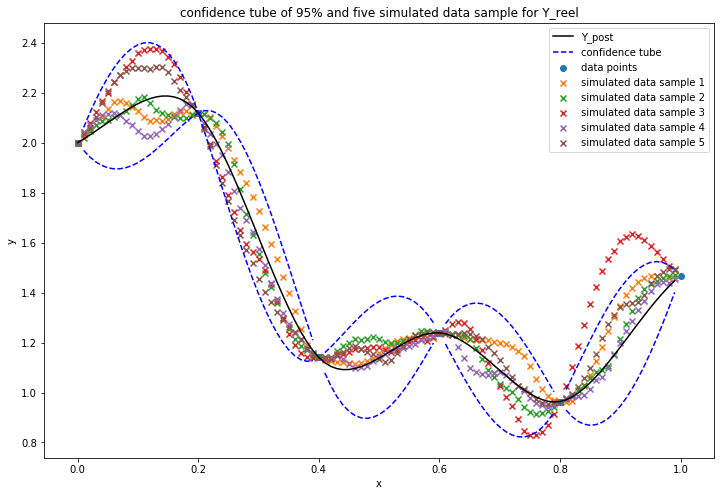

In [39]:
dist_xx = np.abs(xx.reshape((-1,1))-xx.reshape((1,-1)))
Cov_y_prior = sigma2*(1+np.sqrt(6)*dist_xx/l_c)*np.exp(-np.sqrt(6)*dist_xx/l_c)
Cov_y_post = Cov_y_prior - vec_block_trans.dot(mat_block_inv.dot(vec_block)) + 1e-15 * np.identity(n_x)
L = np.linalg.cholesky(Cov_y_post)

plt.figure(figsize=(12,8))
plt.scatter(X_data,Y_data, label = "data points")
plt.plot(xx,Y_post,color='black', label = "Y_post")
plt.plot(xx,Y_post - 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed', label = "confidence tube")
plt.plot(xx,Y_post + 1.96*np.sqrt(Var_post), color='blue', linestyle='dashed')
for i in range(5):
    y_real = Y_post + L.dot(np.random.randn(n_x))
    plt.scatter(xx, y_real, marker='x', label = "simulated data sample {}".format(i+1))
plt.title("confidence tube of 95% and five simulated data sample for Y_reel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [40]:
n_repeat = 1000
L_MC = np.zeros(n_repeat)
for i in range(n_repeat):
    y_real = Y_post + L.dot(np.random.randn(n_x))
    dx = xx[1:] - xx[0:-1]
    f_deriv = (y_real[1:] - y_real[0:-1])/(dx)
    L_MC[i] = np.sqrt(1+f_deriv**2).T.dot(dx)
    
L_mean = np.mean(L_MC)
L_order = np.sort(L_MC)
print("Mean of L by {} simulations: {}".format(n_repeat, L_mean))
print("Confidence interval of L by {} simulations: [{}, {}]".format(n_repeat, L_order[int(n_repeat*0.05)-1],
                                                                    L_order[int(n_repeat*0.95)-1]))

Mean of L by 1000 simulations: 2.9084236228398095
Confidence interval of L by 1000 simulations: [2.623579602175379, 3.2725212490954823]


## Explanation:
In this part, we use many simulations to estimate the integral L and the result is much closer to the real value. Because in this part, we have simulated many trajectories by using the conditional distribution, and thus have taken the information about correlation between different trajectory points into account.

# Q5

In [41]:
# Q5
def f(x):
    return 1-np.sin(2*np.pi*x + 8*np.exp(2*np.pi*x-7))*(1+0.1*x)
res = opt.minimize(f,0.8,bounds=[(0,1)])
res

      fun: array([-0.09059806])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 6
   status: 0
  success: True
        x: array([ 0.90609654])

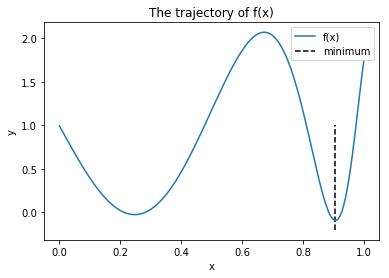

In [42]:
x_grid = np.arange(0,1,0.001)
y_grid = f(x_grid)
plt.figure()
plt.plot(x_grid,y_grid, label = "f(x)")
plt.vlines(res.x,-0.2,1,linestyles="dashed", label ="minimum")
plt.title("The trajectory of f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best")
plt.show()

We have verifies that 
$$ E[(f_{min,n}-Y(x))^+|F_{n}] = \left(f_{min,n}-m_n(x)\right) \Phi\left(\frac{f_{min,n}-m_n(x)}{\sigma_n(x)}\right) + \sigma_n(x) \phi\left(\frac{f_{min,n}-m_n(x)}{\sigma_n(x)}\right)$$

In [43]:
n_repeat = 30
sigma = 1
l_c = 0.1
n_x = 1000

x_n = [0,0.5,1]
f_n = [f(x) for x in x_n]
min_position_list = [x_n[np.argmin(f_n)]]
min_f_list = [np.min(f_n)]
min_f = min_f_list[-1]
record_mn = []
record_freq = 5

for i in range(n_repeat):
    # same as before
    X_data = np.sort(x_n)
    Y_data = f(X_data)
    n_data = len(X_data)
    H = np.stack([np.ones(n_data), X_data],axis = 1)
    R = sigma**2*np.exp(-(X_data.reshape((-1,1))-X_data.reshape((1,-1)))**2/(l_c**2))
    R_inv = np.linalg.inv(R)
    Q_post_inv = np.dot(H.T,R_inv.dot(H))
    Q_post = np.linalg.inv(Q_post_inv)
    beta_post = Q_post.dot(H.T.dot(R_inv.dot(Y_data)))
    # generate uniformly the points between 0 and 1
    xx = np.sort(np.random.rand(n_x))
    h = np.stack([np.ones(n_x), xx],axis = 1)
    r = sigma**2*np.exp(-(xx.reshape((-1,1)) - X_data.reshape((1,-1)))**2/(l_c**2))
    m_n = h.dot(beta_post)+r.dot(R_inv.dot(Y_data-H.dot(beta_post)))
    mat_block = np.block([[np.zeros((2,2)),H.T],[H,R]])
    mat_block_inv = np.linalg.inv(mat_block)
    vec_block = np.block([[h.T],[r.T]])
    vec_block_trans = vec_block.T
    Var_post = sigma**2 - np.diag(vec_block_trans.dot(mat_block_inv.dot(vec_block)))
    sig_n = np.sqrt(Var_post)
    
    #  conditional expectation
    points = (min_f-m_n)/sig_n
    expectation = sig_n*(points*sts.norm.cdf(points) + sts.norm.pdf(points))
    index = np.argmax(expectation)
    pos_x = xx[index]
    if pos_x in x_n:
        continue
    value = f(pos_x)
    x_n.append(pos_x)
    f_n.append(value)
    
    # keep track of the minimum value and positions
    if value < min_f:
        min_f_list.append(value)
        min_position_list.append(pos_x)
        min_f = value
        
    if i%record_freq ==0:
        record_mn.append(m_n)

/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-pa

In [44]:
print("The minimum value of the function: {}".format(min_f))
print("The location of minimum value: {}".format(min_position_list[-1]))


The minimum value of the function: -0.08927927764032995
The location of minimum value: 0.9036115653819871


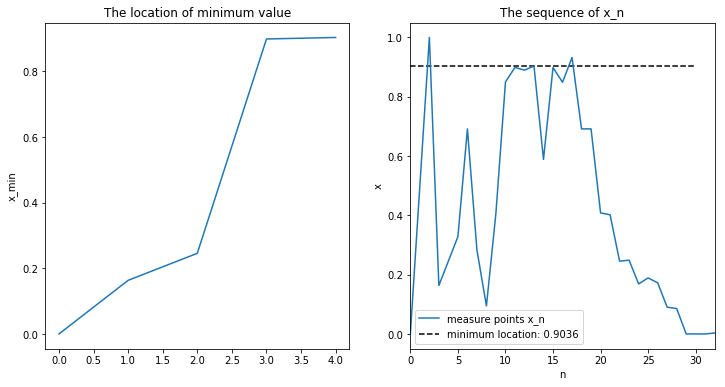

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(len(min_position_list)), min_position_list)
plt.title("The location of minimum value")
plt.ylabel("x_min")
plt.subplot(1,2,2)
plt.plot(range(len(x_n)), x_n,label = "measure points x_n")
plt.hlines(min_position_list[-1],0,n_repeat, linestyles="dashed", label = "minimum location: {0:.4f}".format(min_position_list[-1]))
plt.xlim(0,n_repeat+2)
plt.legend()
plt.title("The sequence of x_n")
plt.ylabel("x")
plt.xlabel("n")
plt.show()

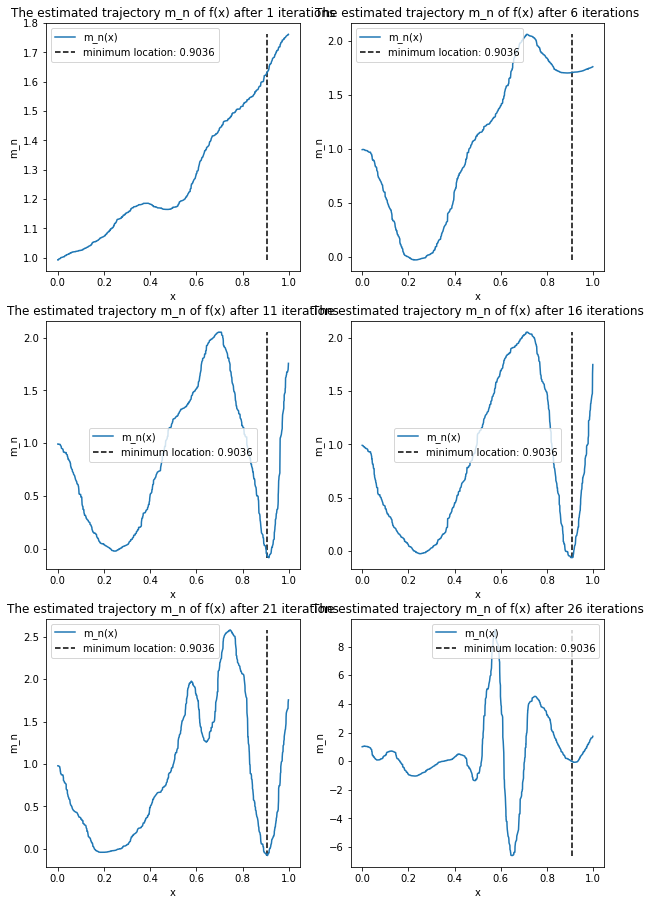

In [46]:
num_plots = len(record_mn)
plt.figure(figsize=(10, 5*int(num_plots/2)+6))
for i in range(num_plots):
    plt.subplot(int(num_plots/2)+1, 2, i+1)
    plt.plot(xx,record_mn[i], label = "m_n(x)")
    plt.vlines(res.x,min(record_mn[i]),max(record_mn[i]),linestyles="dashed", label = "minimum location: {0:.4f}".format(min_position_list[-1]))
    plt.xlabel("x")
    plt.ylabel("m_n")
    plt.title("The estimated trajectory m_n of f(x) after {} iterations".format(i*record_freq+1))
    plt.legend()
plt.show()

## Comment

As we can see from the results, the algorithm can find the minimum value and its location. However, we do not see a good convergence in this algorithm. If we look at the sequence $x^{(n)}$, we noticed that the algorithm found the minimum at certain iterations, but afterwards the sequence diverged and took very strage values. Furthermore, we  looked at the shape of $m_n(x)$ for different iterations, and we noticed that at first the shape of $m_n(x)$ approached the real shape of the function and the minimum approached to real minimum. However, after several iterations, the shape of $m_n(x)$ deteriorated and diverged to a wierd shape.